In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np
import keras

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle


In [ ]:
!kaggle datasets download -d imbikramsaha/paddy-doctor


100% 1.02G/1.02G [00:18<00:00, 50.6MB/s]
100% 1.02G/1.02G [00:18<00:00, 60.0MB/s]


In [ ]:
!unzip /content/paddy-doctor.zip

Streaming output truncated to the last 5000 lines.
  inflating: paddy-disease-classification/train_images/downy_mildew/100992.jpg  
  inflating: paddy-disease-classification/train_images/downy_mildew/100995.jpg  
  inflating: paddy-disease-classification/train_images/downy_mildew/101015.jpg  
  inflating: paddy-disease-classification/train_images/downy_mildew/101020.jpg  
  inflating: paddy-disease-classification/train_images/downy_mildew/101022.jpg  
  inflating: paddy-disease-classification/train_images/downy_mildew/101024.jpg  
  inflating: paddy-disease-classification/train_images/downy_mildew/101034.jpg  
  inflating: paddy-disease-classification/train_images/downy_mildew/101050.jpg  
  inflating: paddy-disease-classification/train_images/downy_mildew/101078.jpg  
  inflating: paddy-disease-classification/train_images/downy_mildew/101096.jpg  
  inflating: paddy-disease-classification/train_images/downy_mildew/101103.jpg  
  inflating: paddy-disease-classification/train_images/dow

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_data = keras.preprocessing.image_dataset_from_directory(
    'paddy-disease-classification/train_images/',
    batch_size = 70,
    image_size =(240,240),

    shuffle = True,
    seed =123,
    subset ='training',
    validation_split=0.15,
    )
validation_data =keras.preprocessing.image_dataset_from_directory(
    'paddy-disease-classification/train_images/',
    batch_size = 70,
    image_size =(240,240),

    shuffle = True,
    seed =123,
    validation_split =0.15,
    subset ='validation',
    )

Found 10407 files belonging to 10 classes.
Using 8846 files for training.
Found 10407 files belonging to 10 classes.
Using 1561 files for validation.


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization

In [ ]:
resnet_model = Sequential()
pretrained_model= ResNet50(include_top=False,
                   input_shape=(240,240,3),
                   pooling='avg',
                   weights='imagenet')
for layer in pretrained_model.layers:
  layer.trainable=False
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(BatchNormalization())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(BatchNormalization())
resnet_model.add(Dense(10, activation='softmax'))

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
resnet_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
history = resnet_model.fit(training_data,
                    steps_per_epoch=len(training_data),
                    epochs=5,
                    validation_data=validation_data,
                    validation_steps=len(validation_data))

Epoch 1/5
127/127 [==============================] - 2396s 19s/step - loss: 0.9890 - accuracy: 0.7100 - val_loss: 0.8537 - val_accuracy: 0.7687
Epoch 2/5
127/127 [==============================] - 2336s 18s/step - loss: 0.2583 - accuracy: 0.9280 - val_loss: 0.5134 - val_accuracy: 0.8674
Epoch 3/5
127/127 [==============================] - 2354s 19s/step - loss: 0.1037 - accuracy: 0.9775 - val_loss: 0.3792 - val_accuracy: 0.8873
Epoch 4/5
127/127 [==============================] - 2395s 19s/step - loss: 0.0634 - accuracy: 0.9873 - val_loss: 0.3391 - val_accuracy: 0.9020
Epoch 5/5
127/127 [==============================] - 2339s 18s/step - loss: 0.0468 - accuracy: 0.9894 - val_loss: 0.3138 - val_accuracy: 0.9103


In [ ]:
from tensorflow.keras.preprocessing import image

img = image.load_img('/content/paddy-disease-classification/test_images/200001.jpg',target_size =(240,240))
y=image.img_to_array(img)
y = np.expand_dims(y,axis = 0)
pred =np.argmax(resnet_model.predict(y))
op =['bacterial_leaf_blight',
 'bacterial_leaf_streak',
 'bacterial_panicle_blight',
 'blast',
 'brown_spot',
 'dead_heart',
 'downy_mildew',
 'hispa',
 'normal',
 'tungro']
op[pred]

1/1 [==============================] - 2s 2s/step


'hispa'

149/149 [==============================] - 56s 377ms/step
Precision: 0.9264297633350487
Recall: 0.9240895551071394
F1 Score: 0.9243568744777289
ROC AUC Score: 0.9958658530649162

Confusion Matrix:
[[ 427    1    5    9    6   14    3    4    1    9]
 [   0  367    1    1    2    0    4    4    1    0]
 [   0    1  300    1    0   32    0    0    2    1]
 [   1   11    3 1625   15   18   18   12   14   21]
 [   6    8    4   11  868   15   24    7    7   15]
 [   1    2    4   13    0 1411    1    2    1    7]
 [   3    1    2    9    0    5  578   14    3    5]
 [  10    4    2   19   18   18   74 1398   34   17]
 [   1    1   10   11    7   30   18   18 1650   18]
 [   9    4    2   10   16   13   18   12   11  993]]


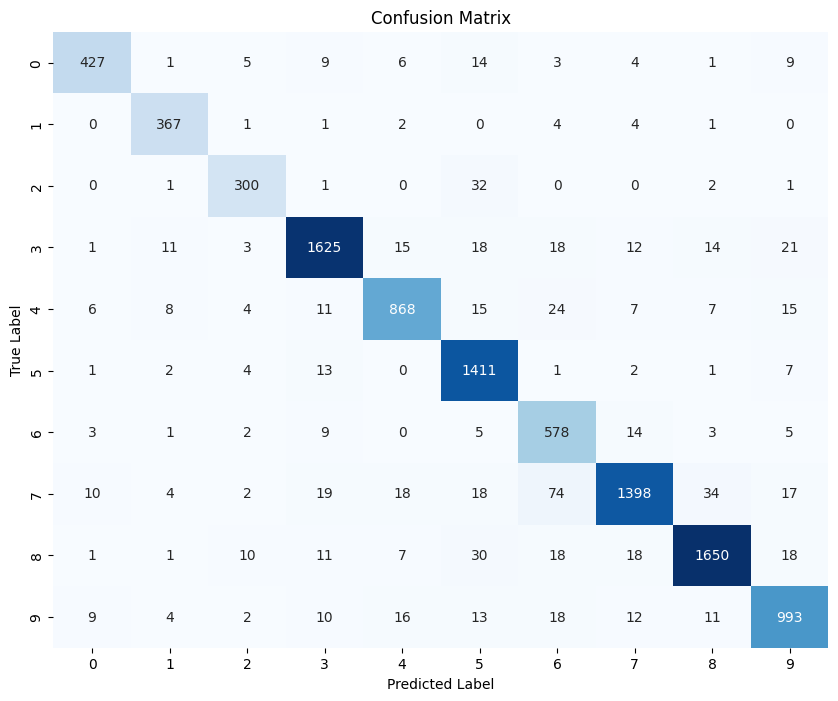

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the image data with ImageDataGenerator
image_size = (240, 240)
batch_size = 70



# Get predictions for validation data
y_pred_prob = resnet_model.predict(training_data)
y_pred = np.argmax(y_pred_prob, axis=1)

# True labels for validation data
y_true = training_data.classes


# Calculate precision
precision = precision_score(y_true, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_true, y_pred, average='weighted')
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_true, y_pred, average='weighted')
print("F1 Score:", f1)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_true, y_pred_prob, multi_class='ovr')
print("ROC AUC Score:", roc_auc)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
